In [3]:
import sys

sys.path.append('../sbe_vallib')

In [4]:
from validation import validate

## Создаем данные

In [8]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

dataset = make_classification(n_samples=int(1e4),
                              n_features=50,
                              n_informative=5,
                              n_redundant=5, #linear combinations of the informative features
                              n_repeated=5,
                              shuffle=False,
                              random_state=1520)
feature_names = [f'feat_{i}' for i in range(50)]
x_train, x_oos, y_train, y_oos = train_test_split(*dataset, test_size=0.4)
model = RandomForestClassifier(n_estimators=20, n_jobs=2, max_depth=2, max_features=40).fit(x_train, y_train)

In [9]:
!rm -rf ./tests_results_corr

Calculating logs:
	Preprocessor is not defined, data will not be preprocessed.
	Fitting preprocessor...
	Fitting model...
	Making train/test predictions...
	Making pickles...
	Calculating statistics for confidence intervals on 50 iterations:


100%|██████████| 50/50 [00:38<00:00,  1.30it/s]


	Calculating feature importance on 3 split and 3 shuffle iterations:
	Iteration: split 0 / shuffle 0


100%|██████████| 50/50 [00:17<00:00,  2.83it/s]


	Iteration: split 0 / shuffle 1


100%|██████████| 50/50 [00:21<00:00,  2.31it/s]


	Iteration: split 0 / shuffle 2


100%|██████████| 50/50 [00:26<00:00,  1.91it/s]


	Iteration: split 1 / shuffle 0


100%|██████████| 50/50 [00:24<00:00,  2.06it/s]


	Iteration: split 1 / shuffle 1


100%|██████████| 50/50 [00:24<00:00,  2.02it/s]


	Iteration: split 1 / shuffle 2


100%|██████████| 50/50 [00:23<00:00,  2.08it/s]


	Iteration: split 2 / shuffle 0


100%|██████████| 50/50 [00:24<00:00,  2.07it/s]


	Iteration: split 2 / shuffle 1


100%|██████████| 50/50 [00:24<00:00,  2.03it/s]


	Iteration: split 2 / shuffle 2


100%|██████████| 50/50 [00:24<00:00,  2.07it/s]


	Calculating train/test independence stats on 200 iterations:


100%|██████████| 200/200 [54:38<00:00, 16.39s/it]


Logs are successfully calculated.
--------------------------------------------------------------------------------
Executing test_1_2
Executing test_2_1
Executing test_2_2


100%|██████████| 3/3 [00:14<00:00,  4.89s/it]


Executing test_2_3
Executing test_2_4
Executing test_2_5


findfont: Font family ['Consolas'] not found. Falling back to DejaVu Sans.


Executing test_3_1
Executing test_3_2
Executing test_4_1
Executing test_4_2


100%|██████████| 3/3 [00:00<00:00, 428.02it/s]


Executing test_5_1
Executing test_5_2
Executing test_5_3
Executing test_5_4
Executing test_5_5
Executing test_5_6
Executing test_5_7
Done.


,Task,Duration (s),Total time (s),Status
0,Start,0.000000,0.000000,OK
1,Fitting preprocessor,0.014645,0.014645,OK
2,Fitting model,3.474824,3.489469,OK
3,Making train/test predictions,0.213695,3.703165,OK
4,Making pickles,0.491663,4.194828,OK
5,Confidence intervals calculation,42.621927,46.816755,OK
6,Feature importance calculation,221.879256,268.696011,OK
7,Train/test independence calculation,3295.687964,3564.383975,OK
8,test_1_2,2.338362,3566.722337,OK
9,test_2_1,0.565278,3567.287615,OK


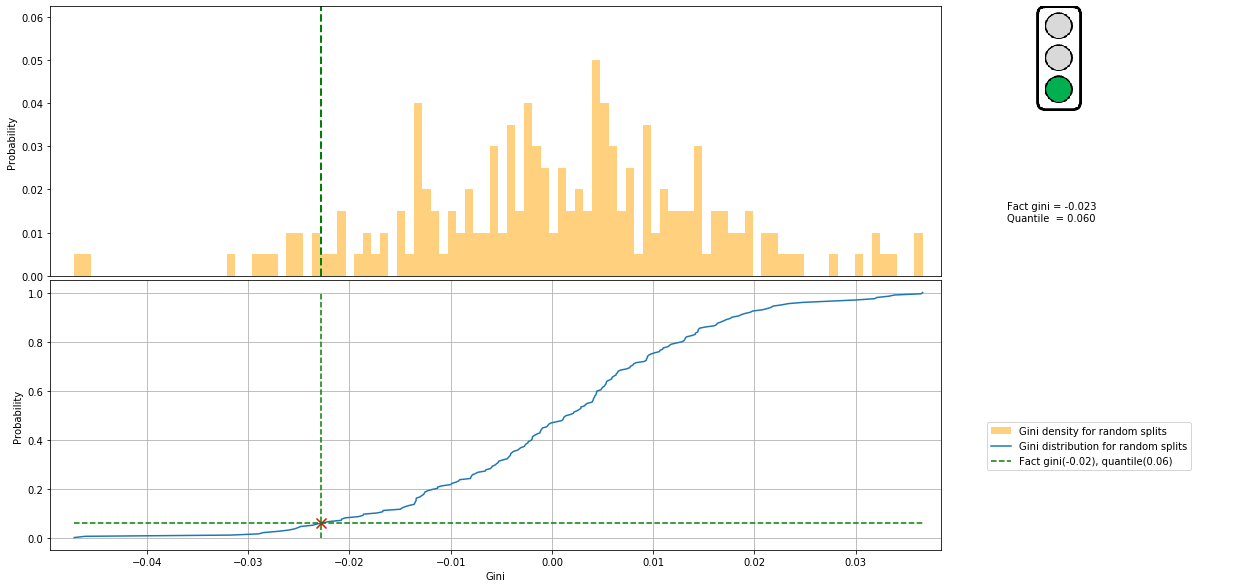

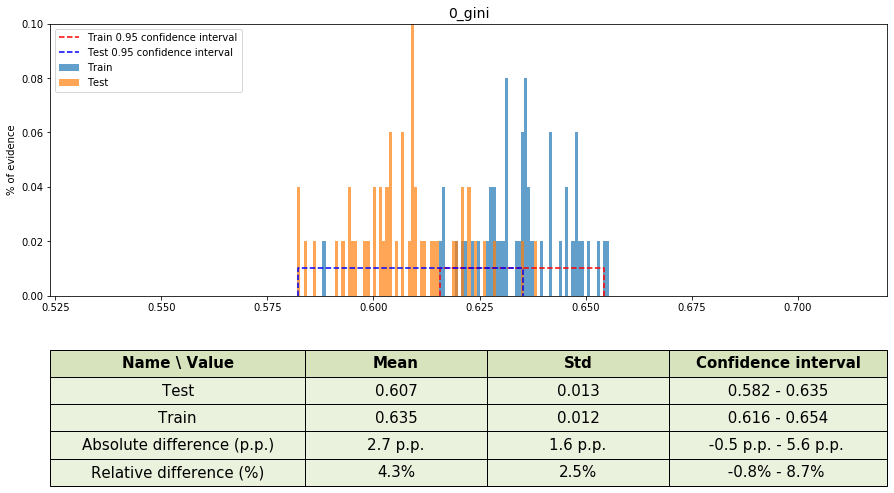

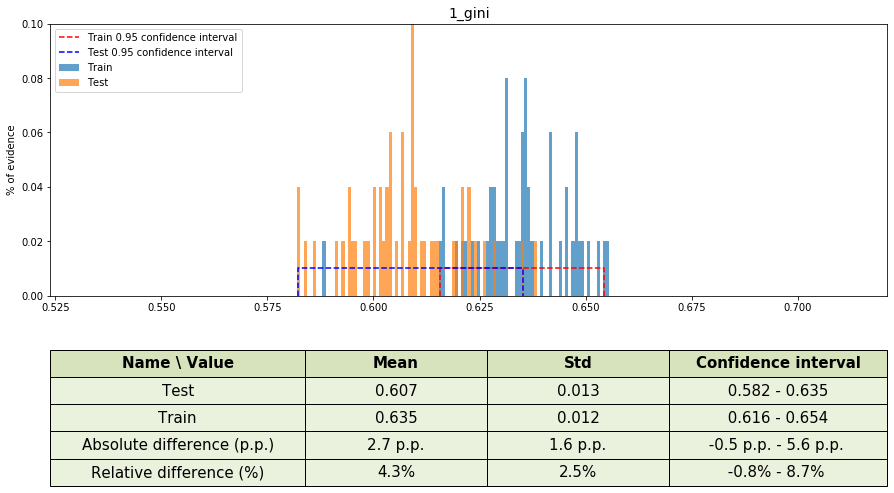

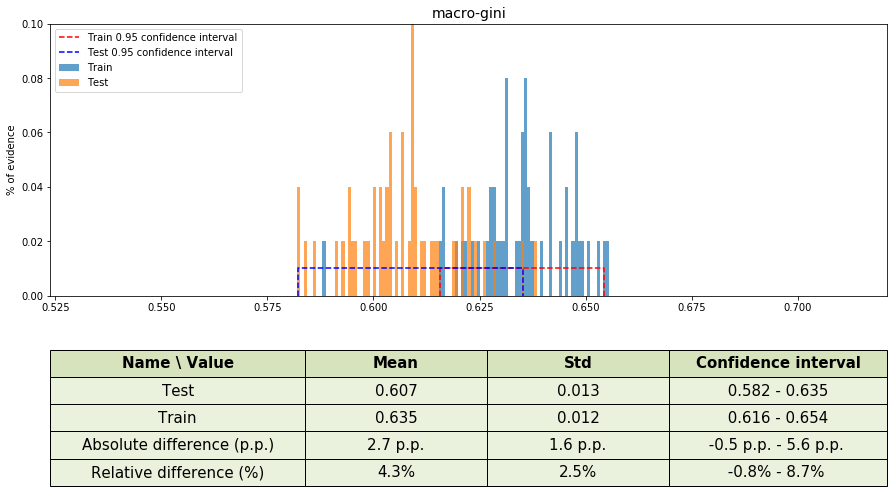

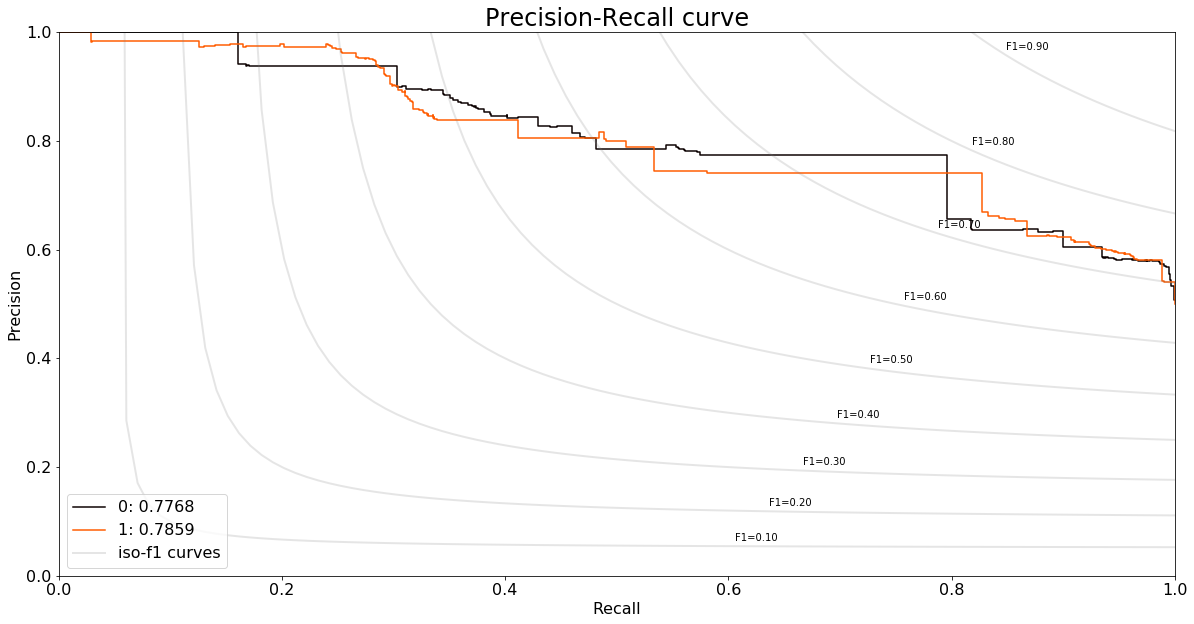

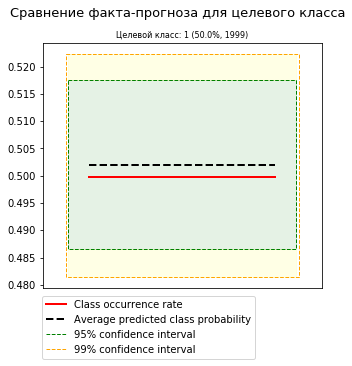

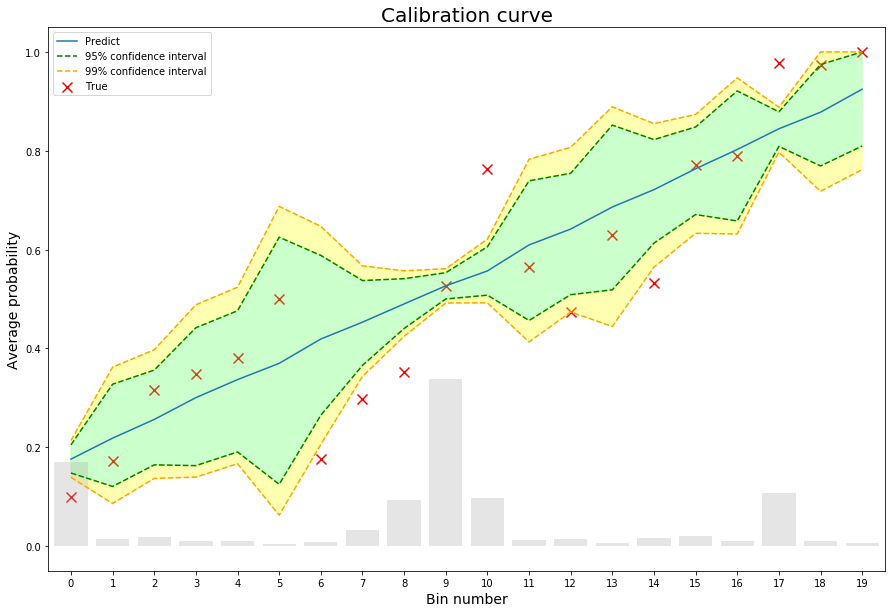

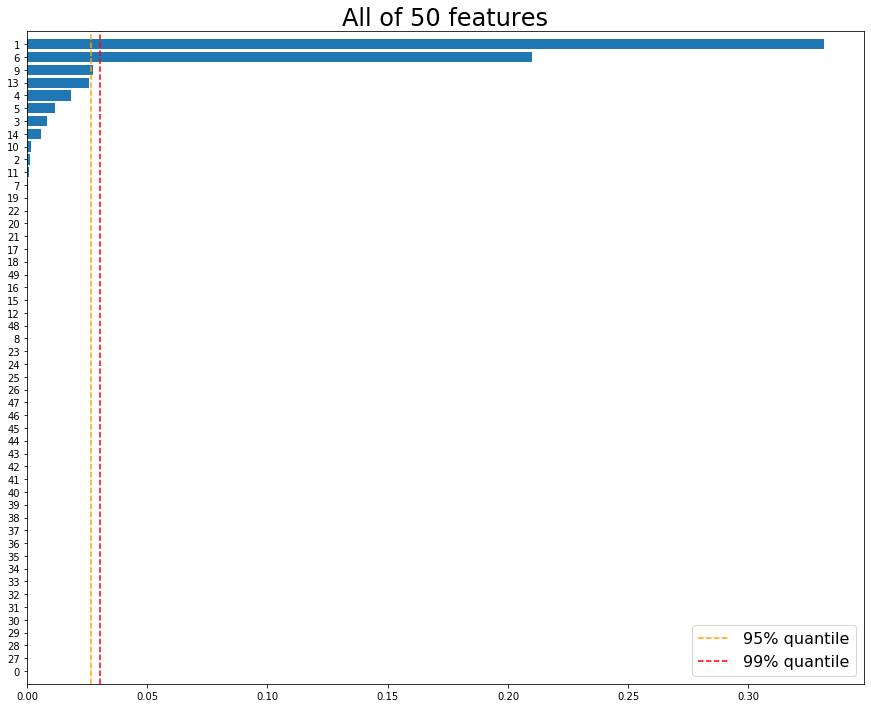

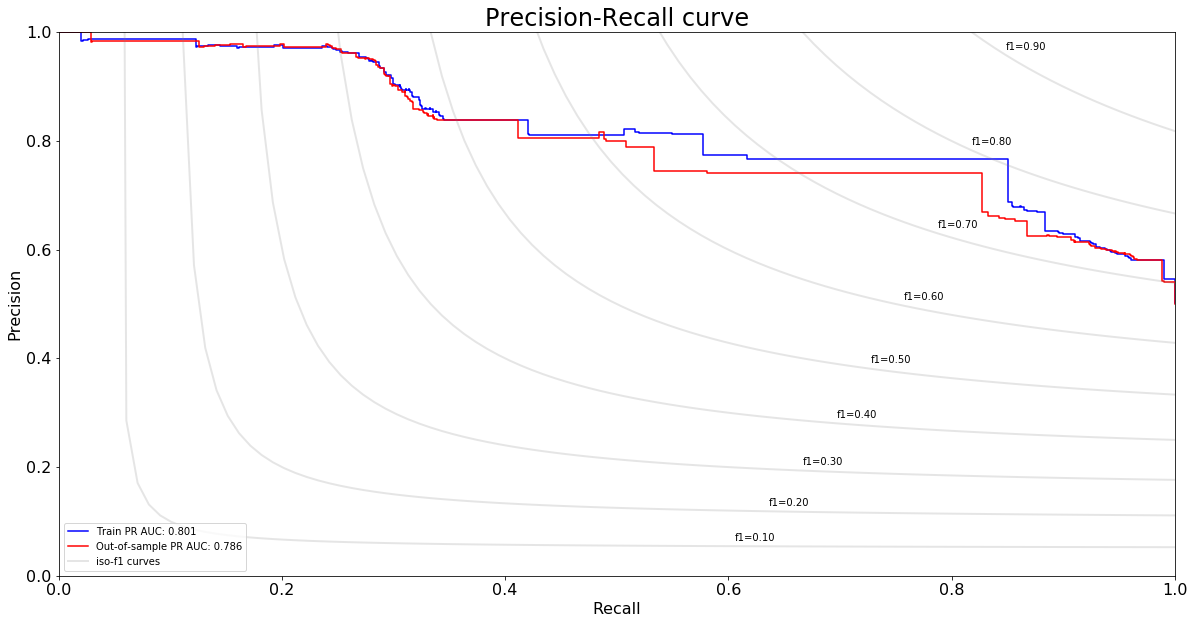

In [10]:
validate(x_train, y_train, model=model,
         model_type='binary',
         X_oos=x_oos,
         y_oos=y_oos,
         path='./tests_results_corr',
         n_iter_conf=50,
         bootstrap_conf_int=True, exclude_list=['test_1_1', 'test_1_3_info', 'test_1_8'] )

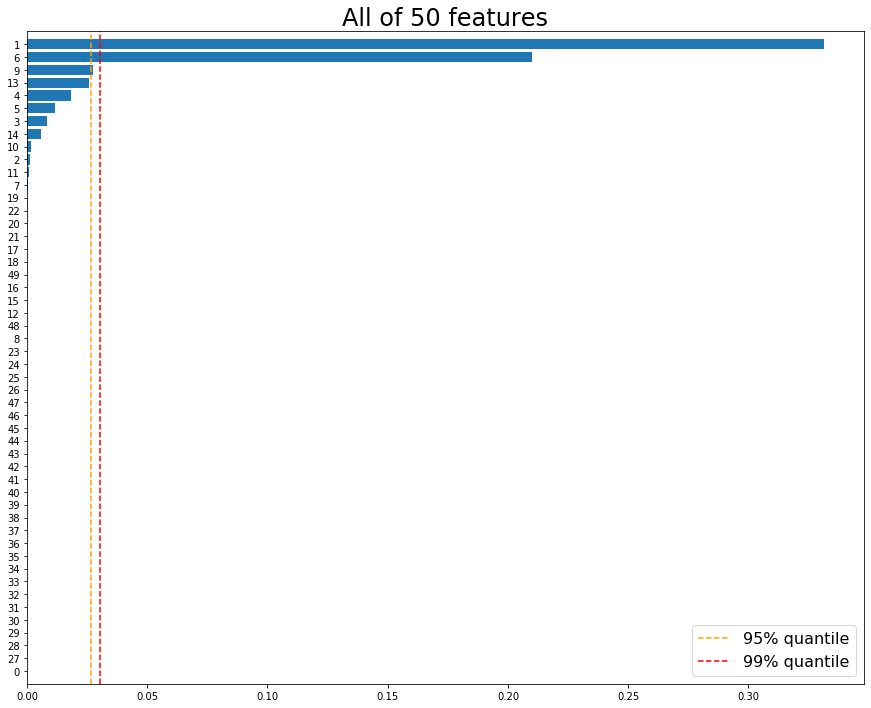

In [12]:
from PIL import Image

Image.open('./tests_results_corr/test_4_1_Feature_importance_best.png')

In [18]:
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np

result = permutation_importance(model, x_oos, y_oos, n_repeats=50, random_state=42, n_jobs=2, scoring='roc_auc_score')
importances = pd.Series(result.importances_mean, index=feature_names)
importances.sort_values(inplace=True, ascending=False)

In [14]:
importances.iloc[np.r_[0:5, -5:0]]

feat_6     0.129000
feat_1     0.067975
feat_3     0.000375
feat_10    0.000300
feat_11    0.000175
feat_29    0.000000
feat_28    0.000000
feat_27    0.000000
feat_0     0.000000
feat_13   -0.000175
dtype: float64

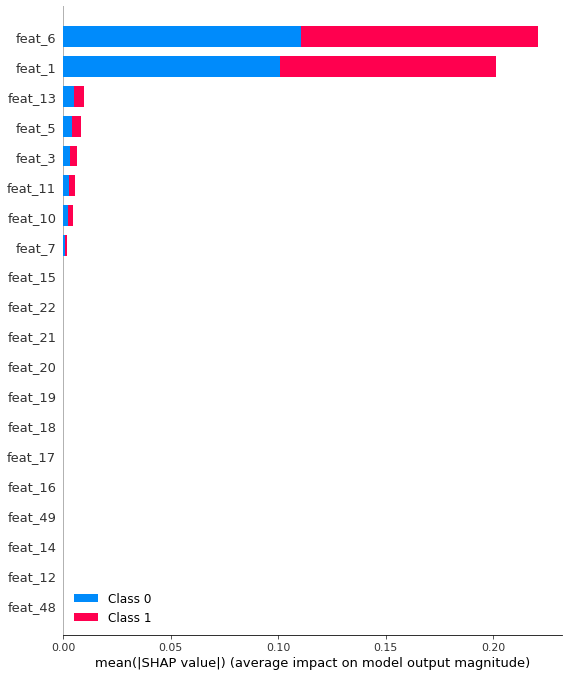

In [15]:
import shap

explainer = shap.TreeExplainer(model)  
shap_values = explainer.shap_values(x_oos)
shap.summary_plot(shap_values, features=x_oos, feature_names=feature_names, plot_type='bar')

In [16]:
#tree based

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
importances = pd.Series(importances, index=feature_names)
importances.sort_values(inplace=True, ascending=False)

In [17]:
importances.iloc[np.r_[0:5, -5:0]]

feat_6     0.512048
feat_1     0.423510
feat_13    0.020068
feat_5     0.012027
feat_11    0.010228
feat_30    0.000000
feat_29    0.000000
feat_28    0.000000
feat_27    0.000000
feat_0     0.000000
dtype: float64